## Homework [DRAFT]

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


In [1]:
# import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

banking_data = pd.read_csv('data/course_lead_scoring.csv')

banking_data.info()

# check for missing values
banking_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [2]:
# replace categorical variables with 'NA'
# and numeric variables with 0

for col in banking_data.columns:
    if banking_data[col].dtype == 'object':
        banking_data[col] = banking_data[col].fillna('NA')
    else:
        banking_data[col] = banking_data[col].fillna(0)

# check again for missing values
banking_data.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
> `retail`


In [3]:
# check the mode for 'industry' column
banking_data['industry'].mode()[0]

'retail'

In [4]:
# confirm the mode for 'industry' column
banking_data['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
> `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

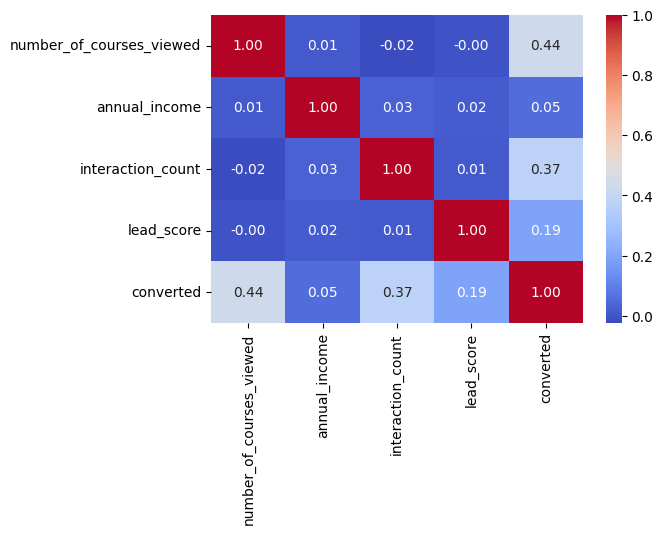

In [5]:
# correlation matrix for numeric variables
corr_matrix = banking_data.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [6]:
# print the correlation matrix with the values of the homework

corr_to_check = [
    ('interaction_count', 'lead_score'),
    ('number_of_courses_viewed', 'lead_score'),
    ('number_of_courses_viewed', 'interaction_count'),
    ('annual_income', 'interaction_count')
]

for var1, var2 in corr_to_check:
    corr_value = corr_matrix.loc[var1, var2]
    print(f"Correlation between {var1} and {var2}: {corr_value:.3f}")


Correlation between interaction_count and lead_score: 0.010
Correlation between number_of_courses_viewed and lead_score: -0.005
Correlation between number_of_courses_viewed and interaction_count: -0.024
Correlation between annual_income and interaction_count: 0.027


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [7]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(banking_data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


len(df_train), len(df_val), len(df_test)



(876, 293, 293)

In [8]:
# delete y from df_train, df_val 
y_train = df_train['converted'].values
y_val = df_val['converted'].values

del df_train['converted']
del df_val['converted']

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
> `lead_source`
- `employment_status`

In [11]:
from sklearn.metrics import mutual_info_score

for column in df_train_full.select_dtypes(include=[object]).columns:
    score = mutual_info_score(df_train_full[column], df_train_full['converted'])
    print(column, round(score, 2))

lead_source 0.03
industry 0.01
employment_status 0.01
location 0.0


In [10]:
for column in df_train_full.select_dtypes(include=[object]).columns:
    score = mutual_info_score(df_train[column], y_train)
    print(column, round(score, 2))

lead_source 0.04
industry 0.01
employment_status 0.01
location 0.0


In [ ]:
# check all groups in categorical variables against the global conversion rate

from IPython.display import display

global_conversion_rate = df_train_full['converted'].mean()

for column in df_train_full.select_dtypes(include=[object]).columns:
    print(column)

    df_group = df_train_full.groupby(column)['converted'].agg(['mean', 'count'])
    df_group["difference"] = df_group['mean'] - global_conversion_rate
    df_group["ration"] = df_group['mean'] / global_conversion_rate

    display(df_group)


lead_source


,mean,count,difference,ration
lead_source,,,,
NA,0.669725,109,0.062368,1.102688
events,0.592965,199,-0.014392,0.976304
organic_search,0.615721,229,0.008364,1.013771
paid_ads,0.428571,210,-0.178785,0.705634
referral,0.786408,206,0.179051,1.294804
social_media,0.583333,216,-0.024023,0.960446


industry


,mean,count,difference,ration
industry,,,,
NA,0.557522,113,-0.049835,0.917948
education,0.790210,143,0.182853,1.301064
finance,0.556886,167,-0.050470,0.916901
healthcare,0.593333,150,-0.014023,0.976911
manufacturing,0.621429,140,0.014072,1.023169
other,0.612903,155,0.005547,1.009132
retail,0.566265,166,-0.041092,0.932343
technology,0.562963,135,-0.044394,0.926907


employment_status


,mean,count,difference,ration
employment_status,,,,
NA,0.571429,84,-0.035928,0.940845
employed,0.671937,253,0.064580,1.106330
self_employed,0.635739,291,0.028382,1.046731
student,0.659722,288,0.052366,1.086219
unemployed,0.462451,253,-0.144906,0.761415


location


,mean,count,difference,ration
location,,,,
NA,0.680000,50,0.072643,1.119606
africa,0.592857,140,-0.014500,0.976127
asia,0.588608,158,-0.018749,0.969130
australia,0.612903,155,0.005547,1.009132
europe,0.641176,170,0.033820,1.055684
middle_east,0.644172,163,0.036815,1.060615
north_america,0.589888,178,-0.017469,0.971238
south_america,0.554839,155,-0.052518,0.913530


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
> - 0.74
- 0.84
- 0.94

In [ ]:
# one-hot encoding for categorical variables with dictVectorizer
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


In [39]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

# evaluate the model on the validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.70


In [40]:
# calculating the accuracy manually
y_pred_manual = (model.predict_proba(X_val)[:, 1] >= 0.5).astype(int)
accuracy_manual = (y_pred_manual == y_val).mean()
print(f"Validation Accuracy (manual calculation): {accuracy_manual:.2f}")

Validation Accuracy (manual calculation): 0.70


In [41]:
# use zip function to check the feature coefficients
for feature, coef in zip(dv.get_feature_names_out(), model.coef_[0]):
    print(f"{feature}: {coef:.3f}")

annual_income: -0.000
employment_status=NA: -0.015
employment_status=employed: 0.034
employment_status=self_employed: 0.003
employment_status=student: 0.012
employment_status=unemployed: -0.103
industry=NA: -0.025
industry=education: 0.049
industry=finance: -0.020
industry=healthcare: -0.013
industry=manufacturing: -0.003
industry=other: -0.009
industry=retail: -0.032
industry=technology: -0.016
interaction_count: 0.311
lead_score: 0.051
lead_source=NA: 0.020
lead_source=events: -0.012
lead_source=organic_search: -0.012
lead_source=paid_ads: -0.115
lead_source=referral: 0.080
lead_source=social_media: -0.030
location=NA: 0.004
location=africa: -0.011
location=asia: -0.011
location=australia: -0.006
location=europe: 0.008
location=middle_east: 0.006
location=north_america: -0.033
location=south_america: -0.025
number_of_courses_viewed: 0.454


In [28]:
# check the coefficients of the model
model.intercept_

array([-0.06914728])

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# here if we know nothing about the customer, what is the probability of conversion?
sigmoid(model.intercept_)

array([0.48272006])

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.

In [46]:
# list of features
features = df_train.columns.tolist()

# create  list of tuples (features, accuracy, difference between accuracy and accuracy without the feature)
feature_accuracies = []

for i in range(len(features)):
    feature_to_eliminate = features[i]

    features_subset = [f for f in features if f != feature_to_eliminate]

    df_train_subset = df_train[features_subset]
    df_val_subset = df_val[features_subset]

    # one-hot encoding for categorical variables with dictVectorizer
    dv_subset = DictVectorizer(sparse=False)
    train_dict_subset = df_train_subset.to_dict(orient='records')
    X_train_subset = dv_subset.fit_transform(train_dict_subset)

    val_dict_subset = df_val_subset.to_dict(orient='records')
    X_val_subset = dv_subset.transform(val_dict_subset)

    model_subset = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_subset.fit(X_train_subset, y_train)

    y_pred_subset = model_subset.predict(X_val_subset)
    accuracy_subset = accuracy_score(y_val, y_pred_subset)

    diference = accuracy - accuracy_subset

    feature_accuracies.append((feature_to_eliminate, accuracy_subset))

# sort the list by smallest difference
feature_accuracies = sorted(feature_accuracies, key=lambda x: (accuracy - x[1]), reverse=False)

# print original accuracy
print(f"Original Validation Accuracy: {accuracy:.4f} \n\n")

for feature, acc in feature_accuracies:
    print(f"Feature eliminate: {feature}, Validation Accuracy: {acc:.4f}, Difference: {accuracy - acc:.4f}")



Original Validation Accuracy: 0.6997 


Feature eliminate: annual_income, Validation Accuracy: 0.8532, Difference: -0.1536
Feature eliminate: location, Validation Accuracy: 0.7099, Difference: -0.0102
Feature eliminate: lead_score, Validation Accuracy: 0.7065, Difference: -0.0068
Feature eliminate: lead_source, Validation Accuracy: 0.7031, Difference: -0.0034
Feature eliminate: industry, Validation Accuracy: 0.6997, Difference: 0.0000
Feature eliminate: employment_status, Validation Accuracy: 0.6962, Difference: 0.0034
Feature eliminate: number_of_courses_viewed, Validation Accuracy: 0.5563, Difference: 0.1433
Feature eliminate: interaction_count, Validation Accuracy: 0.5563, Difference: 0.1433


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

> - 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.


In [48]:
# C values
C_values = [0.01, 0.1, 1, 10, 100]
results = []

# fit the dictVectorizer again to avoid data leakage
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

for c in C_values:

    model_c = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model_c.fit(X_train, y_train)

    y_pred_c = model_c.predict(X_val)
    accuracy_c = accuracy_score(y_val, y_pred_c)

    results.append((c, accuracy_c))

# print the results
for c, acc in results:
    print(f"C: {c}, Validation Accuracy: {acc:.3f}")

C: 0.01, Validation Accuracy: 0.700
C: 0.1, Validation Accuracy: 0.700
C: 1, Validation Accuracy: 0.700
C: 10, Validation Accuracy: 0.700
C: 100, Validation Accuracy: 0.700
